In [1]:
#importing libraries
import pandas as pd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
import numpy as np
import sklearn
import statsmodels as sm

defining a function to read dataset and to set index as the timestamp

In [2]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col, 
                     parse_dates=[date_col])
    return df

In [3]:
folder_path = Path(r'C:\Users\Shaurya\Downloads') 
csv_file = 'machine_temp_failure_missing.csv'  
date_column = 'timestamp'  

tem_missing = read_dataset(folder_path, csv_file, date_col=date_column)

In [4]:
folder_path1 = Path(r'C:\Users\Shaurya\Downloads') 
csv_file1 = 'machine_temp_failure_original.csv'  
date_column1 = 'timestamp'  

tem_original = read_dataset(folder_path1, csv_file1, date_col=date_column1)

In [95]:
tem_missing.describe()

temperature  delta_temperature        ffill        bfill         mean   
count  1795.000000        1792.000000  1891.000000  1891.000000  1891.000000  \
mean     85.978803           0.001908    86.126685    85.643710    85.965487   
std      13.464219           0.323870    13.291729    13.501261    13.084465   
min      20.641281          -1.755475    20.641281    20.641281    20.641281   
25%      82.850726          -0.121867    82.751587    82.371402    83.703792   
50%      89.352581          -0.009654    89.476799    89.203353    88.732542   
75%      93.789990           0.102345    94.204409    93.649707    93.497309   
max     106.303664           3.955118   106.303664   106.303664   106.303664   

       Median Strategy  Most Frequent Strategy  bayesianRidge  extra_trees   
count      1891.000000             1891.000000    1891.000000  1891.000000  \
mean         86.151547               81.211647      85.965487    85.965487   
std          13.107215               23.022709      13.084465    13.084465   
min          20.641281                2.084721      20.641281    20.641281   
25%          83.729827               80.692048      83.703792    83.703792   
50%          89.251290               88.635016      88.732542    88.732542   
75%          93.507171               93.436589      93.497309    93.497309   
max         106.303664              106.303664     106.303664   106.303664   

           bagging  elastic_net  linear_regression          knn       linear   
count  1891.000000  1891.000000        1891.000000  1891.000000  1891.000000  \
mean     85.965487    85.965487          85.965487    85.965487    85.902113   
std      13.084465    13.084465          13.084465    13.084465    13.254104   
min      20.641281    20.641281          20.641281    20.641281    20.641281   
25%      83.703792    83.703792          83.703792    83.703792    82.609369   
50%      88.732542    88.732542          88.732542    88.732542    89.093725   
75%      93.497309    93.497309          93.497309    93.497309    93.649707   
max     106.303664   106.303664         106.303664   106.303664   106.303664   

         quadratic      nearest        cubic       spline   polynomial   
count  1891.000000  1891.000000  1891.000000  1891.000000  1891.000000  \
mean     83.612490    85.898753    83.470948    83.711776    83.470948   
std      21.571555    13.379618    21.717154    19.771583    21.717154   
min     -81.172184    20.641281   -72.039048   -46.305825   -72.039048   
25%      81.968090    82.599994    81.931308    81.900222    81.931308   
50%      89.008594    89.337717    88.983847    88.978330    88.983847   
75%      93.649707    93.649707    93.649707    93.649707    93.649707   
max     106.303664   106.303664   106.303664   106.303664   106.303664   

             zscore  
count  1.795000e+03  
mean  -1.425044e-16  
std    1.000000e+00  
min   -4.852678e+00  
25%   -2.323252e-01  
50%    2.505736e-01  
75%    5.801441e-01  
max    1.509546e+00

In [94]:
tem_missing.isnull().sum()

temperature               96
delta_temperature         99
ffill                      0
bfill                      0
mean                       0
Median Strategy            0
Most Frequent Strategy     0
bayesianRidge              0
extra_trees                0
bagging                    0
elastic_net                0
linear_regression          0
knn                        0
linear                     0
quadratic                  0
nearest                    0
cubic                      0
spline                     0
polynomial                 0
zscore                    96
dtype: int64

In [8]:
tem_missing["temperature"] = tem_missing["value"]
tem_original["temperature"] = tem_original["value"]

In [9]:
tem_missing = tem_missing.drop("value", axis=1)
tem_original = tem_original.drop("value", axis=1)


In [10]:
tem_missing['delta_temperature'] = tem_missing['temperature'].shift(-1) - tem_missing['temperature']

In [11]:
tem_missing

temperature  delta_temperature
timestamp                                       
02-12-2013 21:15    73.967322           0.968560
02-12-2013 21:20    74.935882           1.188280
02-12-2013 21:25    76.124162           2.016546
02-12-2013 21:30    78.140707           1.189128
02-12-2013 21:35    79.329836          -0.619417
...                       ...                ...
19-02-2014 15:05    98.185415          -0.381246
19-02-2014 15:10    97.804168          -0.668700
19-02-2014 15:15    97.135468           0.921384
19-02-2014 15:20    98.056852          -1.152991
19-02-2014 15:25    96.903861                NaN

[22695 rows x 2 columns]

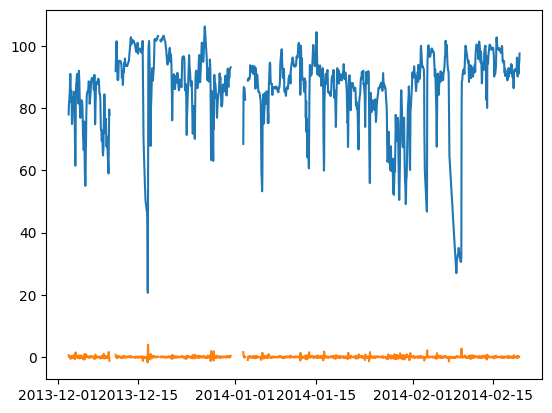

In [96]:
plt.plot(tem_missing["temperature"])
plt.plot(tem_missing["delta_temperature"])

In [13]:
import hvplot.pandas


In [14]:
tem_missing.hvplot.line(x='timestamp', y='temperature')

:Curve   [timestamp]   (temperature)

In [15]:
tem_missing.hvplot.line(x='timestamp', y='delta_temperature')

:Curve   [timestamp]   (delta_temperature)

In [16]:

tem_missing['color'] = tem_missing['temperature'].apply(lambda x: 'red' if x > 70.00 else 'blue')


tem_missing.hvplot.scatter(x='timestamp', y='temperature', color='color', xlabel='X-axis label', ylabel='Temperature', title='Temperature Plot')



:Scatter   [timestamp]   (temperature,color)

In [17]:
tem_missing = tem_missing.drop("color", axis=1)

In [18]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()

In [19]:
def rmse_score(df1, df2, col=None):
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [20]:
tem_missing.isnull().sum()

temperature          1285
delta_temperature    1315
dtype: int64

In [21]:
tem_missing["ffill"] = tem_missing["temperature"].fillna(method="ffill")
tem_missing["bfill"] = tem_missing["temperature"].fillna(method="bfill")
tem_missing["mean"] = tem_missing["temperature"].fillna(tem_missing["temperature"].mean())

In [22]:
from sklearn.impute import SimpleImputer


In [23]:
strategy = [('Median Strategy', 'median'),('Most Frequent Strategy', 'most_frequent')]

In [24]:
tem_vals = tem_missing['temperature'].values.reshape(-1,1)

In [25]:
for strategy_name,strategies in strategy:
    tem_missing[strategy_name] = (SimpleImputer(strategy=strategies).fit_transform(tem_vals))

In [26]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor, BaggingRegressor
from sklearn.linear_model import ElasticNet, LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor

In [27]:
estimators = [
    ('bayesianRidge', BayesianRidge()),
    ('extra_trees', ExtraTreesRegressor(n_estimators=10)),
    ('bagging', BaggingRegressor(n_estimators=10)),
    ('elastic_net', ElasticNet()),
    ('linear_regression', LinearRegression()),
    ('knn', KNeighborsRegressor(n_neighbors=3))
]

In [28]:
tem_vals1 = tem_missing["temperature"].values.reshape(-1,1)
for e_name, e in estimators:
    est = IterativeImputer(random_state=1, estimator=e).fit(tem_vals1)
    tem_missing[e_name] = est.transform(tem_vals1)

In [29]:
tem_original.index = pd.to_datetime(tem_original.index, format='%d-%m-%Y %H:%M:%S').strftime('%d-%m-%Y %H:%M')


In [41]:

tem_missing.index = pd.to_datetime(tem_missing.index, format='%d-%m-%Y %H:%M')
tem_missing = tem_missing.resample('H').mean()
tem_original.index = pd.to_datetime(tem_original.index, format='%d-%m-%Y %H:%M')
tem_original = tem_original.resample('H').mean()

In [37]:
interpolations = [
    'linear',
    'quadratic',
    'nearest',
    'cubic'
]

for intp in interpolations:
    tem_missing[intp] = tem_missing['temperature'].interpolate(method=intp)
tem_missing['spline'] = \
        tem_missing['temperature'].interpolate(method='spline', order=3)
tem_missing['polynomial'] = \
        tem_missing['temperature'].interpolate(method='polynomial',order=3)


In [40]:
rmse_score(tem_original, tem_missing, "temperature")

RMSE for delta_temperature: 87.01571835371645
RMSE for ffill: 2.4593009259990724
RMSE for bfill: 5.855409226275205
RMSE for mean: 3.916579487201584
RMSE for Median Strategy: 4.029301232267311
RMSE for Most Frequent Strategy: 19.743530731907093
RMSE for bayesianRidge: 3.916579487201584
RMSE for extra_trees: 3.916579487201584
RMSE for bagging: 3.916579487201584
RMSE for elastic_net: 3.916579487201584
RMSE for linear_regression: 3.916579487201584
RMSE for knn: 3.916579487201584
RMSE for linear: 4.195058482857605
RMSE for quadratic: 18.638154066057563
RMSE for nearest: 4.5978436292474045
RMSE for cubic: 18.869605672548804
RMSE for spline: 16.136543279800197
RMSE for polynomial: 18.869605672548804


[87.01571835371645,
 2.4593009259990724,
 5.855409226275205,
 3.916579487201584,
 4.029301232267311,
 19.743530731907093,
 3.916579487201584,
 3.916579487201584,
 3.916579487201584,
 3.916579487201584,
 3.916579487201584,
 3.916579487201584,
 4.195058482857605,
 18.638154066057563,
 4.5978436292474045,
 18.869605672548804,
 16.136543279800197,
 18.869605672548804]

In [42]:
#lowest rmse is for ffill

In [43]:
import seaborn as sns

<Axes: xlabel='temperature', ylabel='Count'>

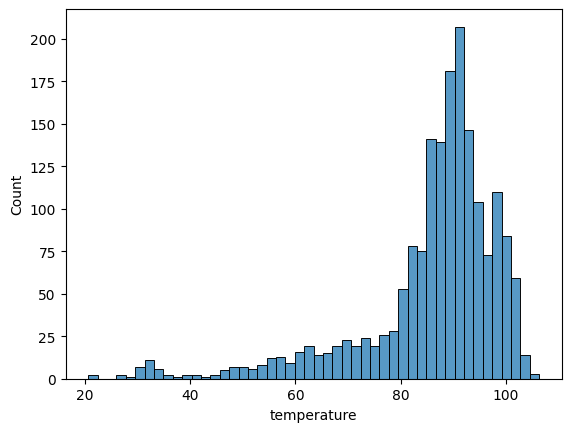

In [44]:
sns.histplot(tem_missing["temperature"])

<Axes: xlabel='temperature'>

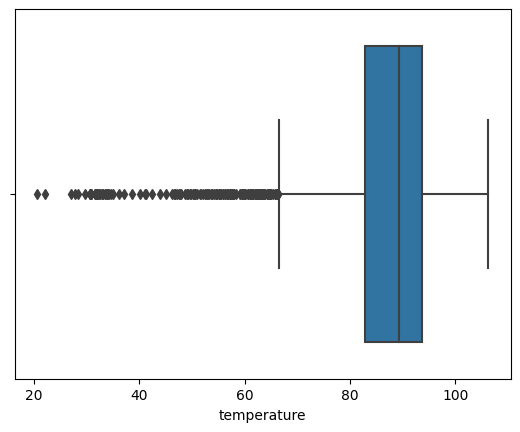

In [45]:
sns.boxplot(x = tem_missing["temperature"], whis=1.5)

<Axes: xlabel='temperature'>

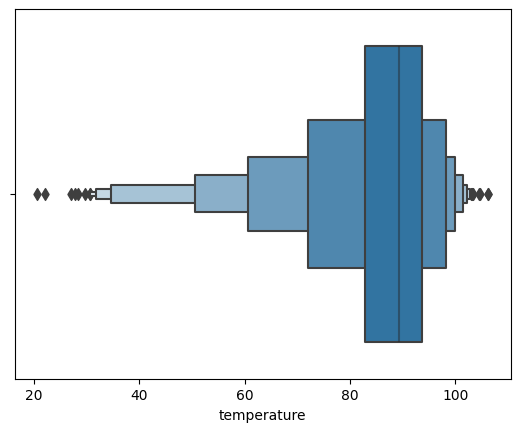

In [46]:
sns.boxenplot(x = tem_missing["temperature"])

In [47]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

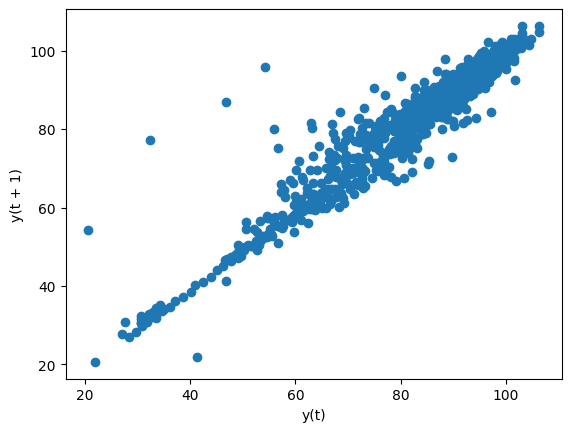

In [48]:
lag_plot(tem_missing['temperature'], lag=1)

In [74]:
def iqr_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    return data[(data[column] < lower_fence) | (data[column] > upper_fence)]

In [75]:
iqr_outliers(tem_missing,'temperature')

temperature  delta_temperature      ffill      bfill   
timestamp                                                                   
2013-12-04 00:00:00    64.696206          -0.320622  64.696206  64.696206  \
2013-12-04 01:00:00    61.532599          -0.226645  61.532599  61.532599   
2013-12-05 16:00:00    61.150198          -0.236645  61.150198  61.150198   
2013-12-05 17:00:00    59.192719          -0.279826  59.192719  59.192719   
2013-12-05 18:00:00    57.223873          -0.015584  57.223873  57.223873   
...                          ...                ...        ...        ...   
2014-02-09 07:00:00    30.880488          -0.040392  30.880488  30.880488   
2014-02-09 08:00:00    30.632596           0.065171  30.632596  30.632596   
2014-02-09 09:00:00    30.583324           0.001818  30.583324  30.583324   
2014-02-09 10:00:00    30.641056           0.007550  30.641056  30.641056   
2014-02-09 11:00:00    32.311358           1.836582  32.311358  32.311358   

                          mean  Median Strategy  Most Frequent Strategy   
timestamp                                                                 
2013-12-04 00:00:00  64.696206        64.696206               64.696206  \
2013-12-04 01:00:00  61.532599        61.532599               61.532599   
2013-12-05 16:00:00  61.150198        61.150198               61.150198   
2013-12-05 17:00:00  59.192719        59.192719               59.192719   
2013-12-05 18:00:00  57.223873        57.223873               57.223873   
...                        ...              ...                     ...   
2014-02-09 07:00:00  30.880488        30.880488               30.880488   
2014-02-09 08:00:00  30.632596        30.632596               30.632596   
2014-02-09 09:00:00  30.583324        30.583324               30.583324   
2014-02-09 10:00:00  30.641056        30.641056               30.641056   
2014-02-09 11:00:00  32.311358        32.311358               32.311358   

                     bayesianRidge  extra_trees    bagging  elastic_net   
timestamp                                                                 
2013-12-04 00:00:00      64.696206    64.696206  64.696206    64.696206  \
2013-12-04 01:00:00      61.532599    61.532599  61.532599    61.532599   
2013-12-05 16:00:00      61.150198    61.150198  61.150198    61.150198   
2013-12-05 17:00:00      59.192719    59.192719  59.192719    59.192719   
2013-12-05 18:00:00      57.223873    57.223873  57.223873    57.223873   
...                            ...          ...        ...          ...   
2014-02-09 07:00:00      30.880488    30.880488  30.880488    30.880488   
2014-02-09 08:00:00      30.632596    30.632596  30.632596    30.632596   
2014-02-09 09:00:00      30.583324    30.583324  30.583324    30.583324   
2014-02-09 10:00:00      30.641056    30.641056  30.641056    30.641056   
2014-02-09 11:00:00      32.311358    32.311358  32.311358    32.311358   

                     linear_regression        knn     linear  quadratic   
timestamp                                                                 
2013-12-04 00:00:00          64.696206  64.696206  64.696206  64.696206  \
2013-12-04 01:00:00          61.532599  61.532599  61.532599  61.532599   
2013-12-05 16:00:00          61.150198  61.150198  61.150198  61.150198   
2013-12-05 17:00:00          59.192719  59.192719  59.192719  59.192719   
2013-12-05 18:00:00          57.223873  57.223873  57.223873  57.223873   
...                                ...        ...        ...        ...   
2014-02-09 07:00:00          30.880488  30.880488  30.880488  30.880488   
2014-02-09 08:00:00          30.632596  30.632596  30.632596  30.632596   
2014-02-09 09:00:00          30.583324  30.583324  30.583324  30.583324   
2014-02-09 10:00:00          30.641056  30.641056  30.641056  30.641056   
2014-02-09 11:00:00          32.311358  32.311358  32.311358  32.311358   

                       nearest      cubic     spline  polynomial  
timestamp               

In [83]:
tem_missing['zscore'] = (tem_missing['temperature'] - tem_missing['temperature'].mean())/tem_missing['temperature'].std()
outliers = tem_missing['temperature'][(tem_missing['zscore'] <= -3) | (tem_missing['zscore'] >= 3)]
print(outliers)

timestamp
2013-12-16 15:00:00    41.296139
2013-12-16 16:00:00    22.004861
2013-12-16 17:00:00    20.641281
2014-02-08 00:00:00    45.034125
2014-02-08 01:00:00    43.997628
2014-02-08 02:00:00    42.390317
2014-02-08 03:00:00    41.009979
2014-02-08 04:00:00    40.183183
2014-02-08 05:00:00    38.557390
2014-02-08 06:00:00    37.155092
2014-02-08 07:00:00    36.099969
2014-02-08 08:00:00    34.692096
2014-02-08 09:00:00    33.584924
2014-02-08 10:00:00    31.861333
2014-02-08 11:00:00    30.854021
2014-02-08 12:00:00    29.705266
2014-02-08 13:00:00    28.383913
2014-02-08 14:00:00    26.971556
2014-02-08 15:00:00    27.713841
2014-02-08 16:00:00    30.747107
2014-02-08 17:00:00    31.530577
2014-02-08 18:00:00    31.766454
2014-02-08 19:00:00    32.102772
2014-02-08 20:00:00    32.880638
2014-02-08 21:00:00    33.001181
2014-02-08 22:00:00    33.455492
2014-02-08 23:00:00    34.279178
2014-02-09 00:00:00    35.088183
2014-02-09 01:00:00    34.127449
2014-02-09 02:00:00    33.797831


In [88]:
def plot_zscore(data, d=3):
    n = len(data)
    plt.figure(figsize=(10,10))
    plt.plot(data,'k^')
    plt.plot([0,n],[d,d],'r--')
    plt.plot([0,n],[-d,-d],'r--')

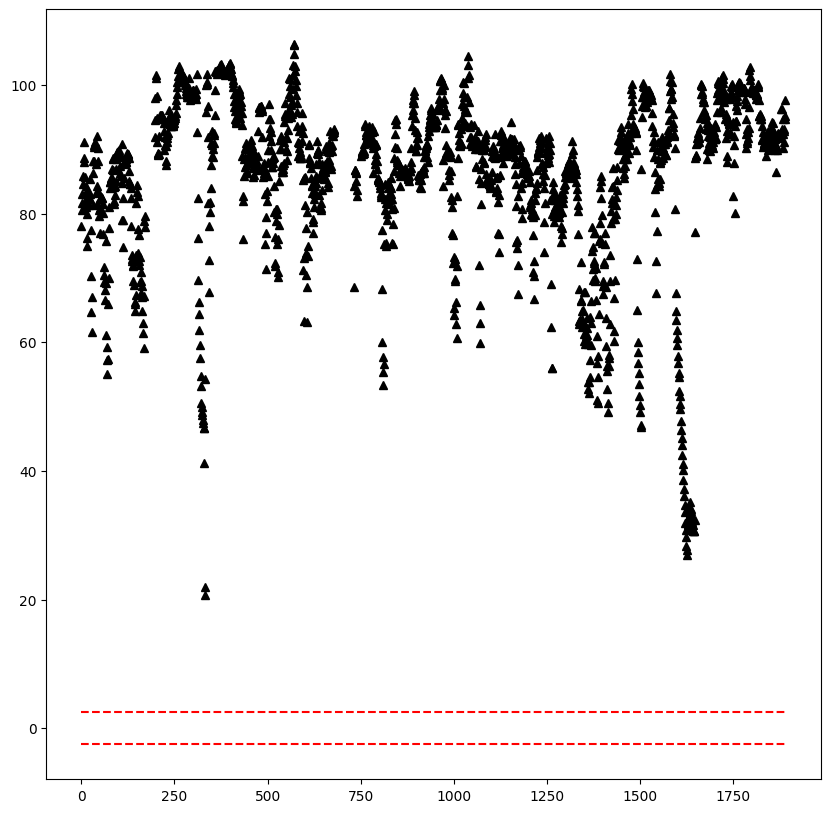

In [89]:
data = tem_missing['temperature'].values
plot_zscore(data, d=2.5)